# Análisis de Casos de COVID-19

Este notebook está diseñado para guiarte paso a paso en el análisis de un conjunto de datos reales sobre casos de COVID-19 en distintas provincias y ciudades. Aprenderás a cargar, inspeccionar, limpiar y visualizar datos usando Python y librerías populares como pandas y matplotlib.

## 1. Carga de datos

Primero, importamos las librerías necesarias y cargamos el archivo `CovidCases.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar el archivo CSV
df = pd.read_csv("data/CovidCases.csv")
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


## 2. Inspección inicial de los datos

Veamos la estructura del DataFrame, los nombres de las columnas y los tipos de datos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [3]:
df.describe(include="all")

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
count,1.740000e+02,174,174,174,174,174.000000,174,174
unique,NaN,17,48,2,81,NaN,66,66
top,NaN,Seoul,-,True,etc,NaN,-,-
freq,NaN,38,53,124,17,NaN,109,109
mean,2.686216e+06,NaN,NaN,NaN,NaN,65.488506,NaN,NaN
std,1.943218e+06,NaN,NaN,NaN,NaN,355.097654,NaN,NaN
min,1.000001e+06,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,1.100006e+06,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
50%,1.700004e+06,NaN,NaN,NaN,NaN,10.000000,NaN,NaN
75%,4.100004e+06,NaN,NaN,NaN,NaN,31.750000,NaN,NaN


## 3. Limpieza de datos

Buscamos valores nulos o inconsistentes, especialmente en las columnas de latitud y longitud.

En este dataset, los valores faltantes están representados por el carácter '-', así que los reemplazaremos por NaN y convertiremos las columnas a tipo numérico.

In [4]:
import numpy as np

df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

df.isnull().sum()

 case_id            0
province            0
city                0
group               0
infection_case      0
confirmed           0
latitude          109
longitude         109
dtype: int64

## 4. Análisis exploratorio

### 4.1. Casos confirmados por provincia

Agrupamos los datos por provincia y sumamos los casos confirmados.

In [5]:
provincia_casos = df.groupby("province")["confirmed"].sum().sort_values(ascending=False)
provincia_casos

province
Daegu                6680
Gyeongsangbuk-do     1324
Seoul                1280
Gyeonggi-do          1000
Incheon               202
Chungcheongnam-do     158
Busan                 156
Gyeongsangnam-do      132
Daejeon               131
Gangwon-do             62
Chungcheongbuk-do      60
Ulsan                  51
Sejong                 49
Gwangju                43
Jeollanam-do           25
Jeollabuk-do           23
Jeju-do                19
Name: confirmed, dtype: int64

### 4.2. Visualización de casos confirmados por provincia

/tmp/ipykernel_223405/1401849106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_casos.values, y=provincia_casos.index, palette="viridis")


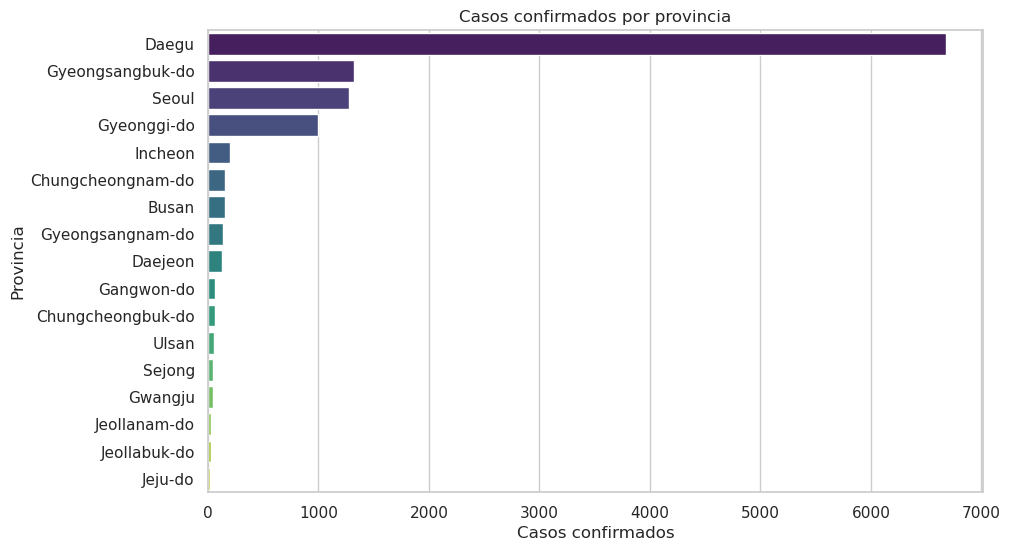

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=provincia_casos.values, y=provincia_casos.index, palette="viridis")
plt.title("Casos confirmados por provincia")
plt.xlabel("Casos confirmados")
plt.ylabel("Provincia")
plt.show()

### 4.3. Tipos de focos de infección más frecuentes

¿Cuáles son los principales focos de infección reportados en el dataset?

In [7]:
focos = df["infection_case"].value_counts().head(10)
focos

infection_case
etc                                              17
overseas inflow                                  17
contact with patient                             16
Shincheonji Church                               15
Itaewon Clubs                                     9
Guro-gu Call Center                               4
Richway                                           4
Geumcheon-gu rice milling machine manufacture     3
Cheongdo Daenam Hospital                          3
Door-to-door sales in Daejeon                     3
Name: count, dtype: int64

/tmp/ipykernel_223405/2418388003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=focos.values, y=focos.index, palette="magma")


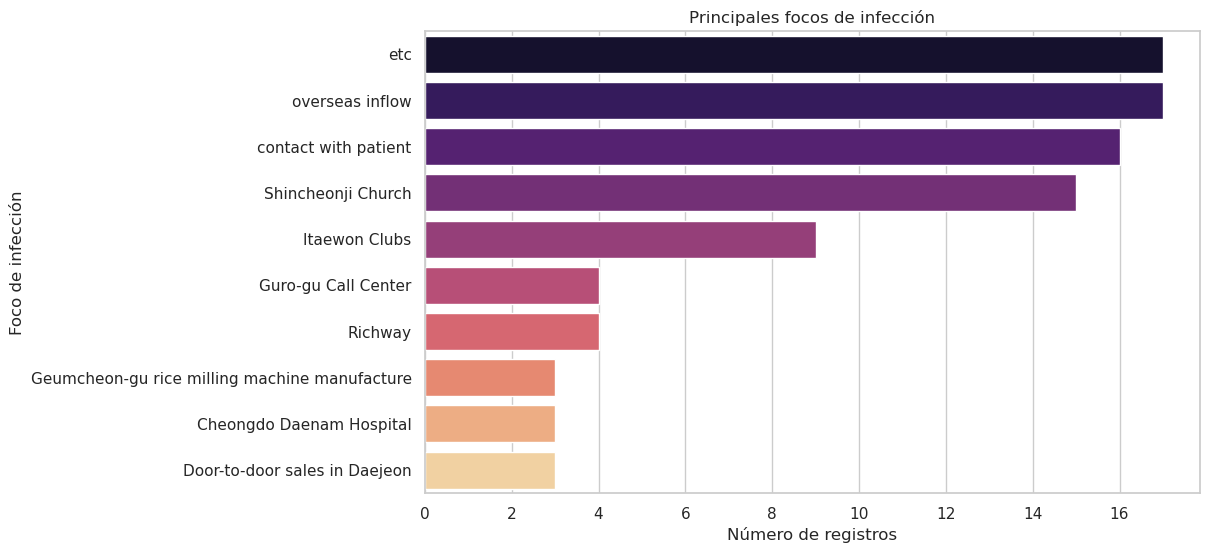

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=focos.values, y=focos.index, palette="magma")
plt.title("Principales focos de infección")
plt.xlabel("Número de registros")
plt.ylabel("Foco de infección")
plt.show()

## 5. Análisis de grupos de infección

Veamos cómo se distribuyen los casos entre los diferentes grupos de infección.

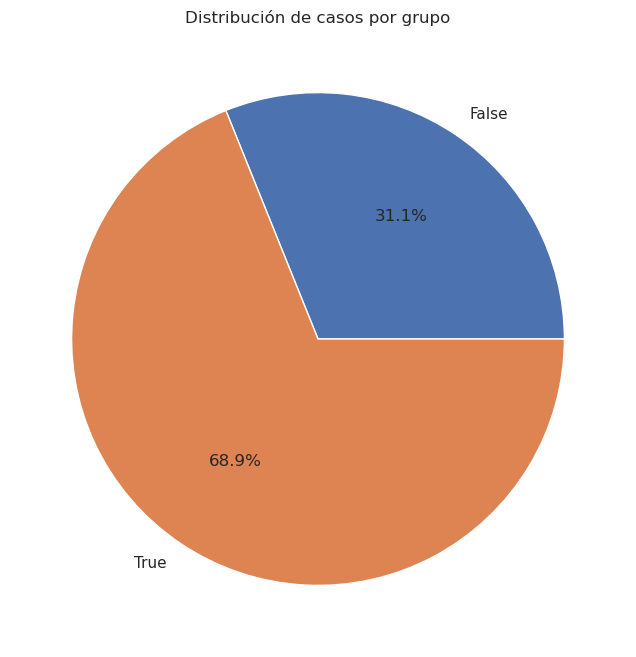

In [9]:
grupo_casos = df.groupby("group")["confirmed"].sum()
plt.figure(figsize=(8, 8))
plt.pie(grupo_casos, labels=grupo_casos.index, autopct="%1.1f%%")
plt.title("Distribución de casos por grupo")
plt.show()

## 6. Análisis de ciudades

Identifiquemos las ciudades con mayor número de casos confirmados.

/tmp/ipykernel_223405/1122060428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ciudad_casos.values, y=ciudad_casos.index, palette="plasma")


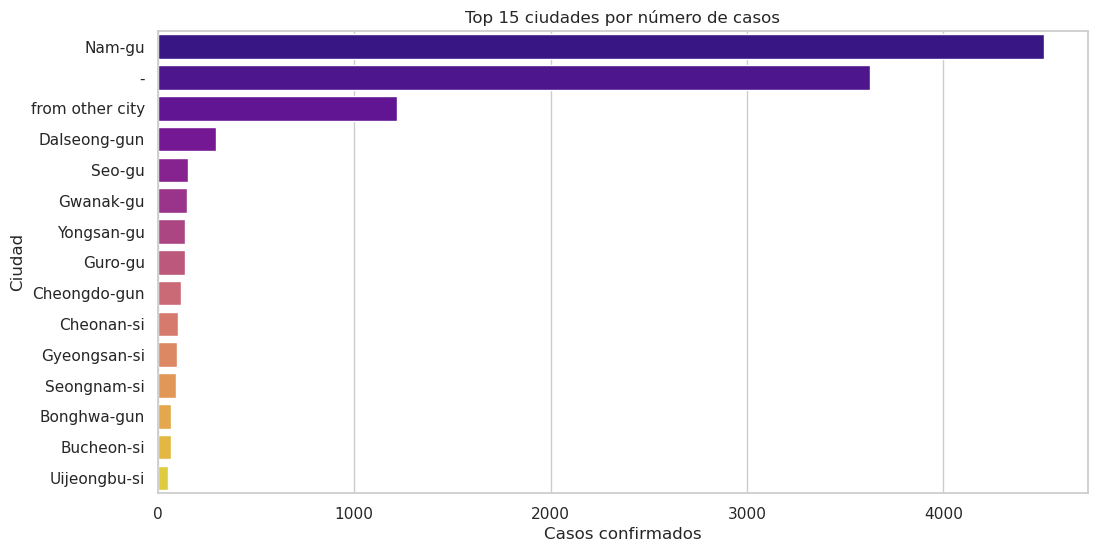

In [10]:
ciudad_casos = (
    df.groupby("city")["confirmed"].sum().sort_values(ascending=False).head(15)
)
plt.figure(figsize=(12, 6))
sns.barplot(x=ciudad_casos.values, y=ciudad_casos.index, palette="plasma")
plt.title("Top 15 ciudades por número de casos")
plt.xlabel("Casos confirmados")
plt.ylabel("Ciudad")
plt.show()

## 7. Análisis de correlación

Veamos si existe alguna correlación entre las variables numéricas del dataset.

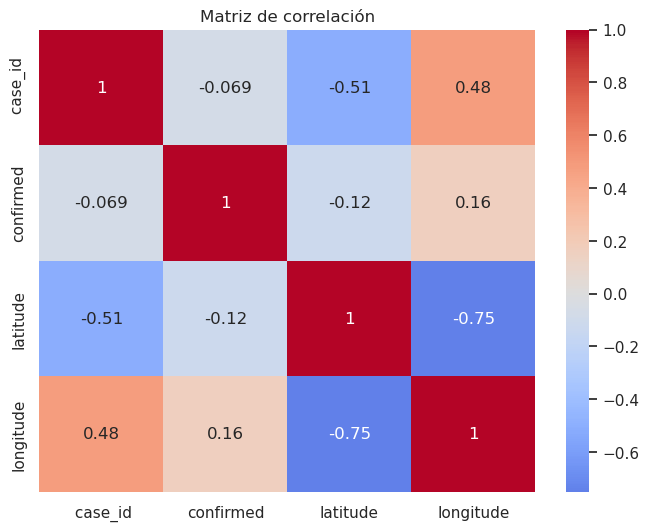

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

## 8. Comparación con Excel: Funciones y Operaciones Comunes

En esta sección, veremos cómo realizar operaciones comunes de Excel usando Python. Esto te ayudará a entender las similitudes y diferencias entre ambos enfoques.

### 8.1. Tablas Dinámicas (Pivot Tables)

En Excel, las tablas dinámicas son una herramienta poderosa para resumir datos. En Python, podemos lograr lo mismo usando `pivot_table` de pandas.

**En Excel:**
- Seleccionar datos
- Insertar > Tabla dinámica
- Arrastrar campos a filas, columnas y valores

**En Python:**
Usamos el método `pivot_table` con parámetros similares:

In [12]:
# Crear una tabla dinámica similar a Excel
pivot = pd.pivot_table(
    df, values="confirmed", index="province", columns="group", aggfunc="sum"
)
pivot

group,False,True
province,,
Busan,85,71
Chungcheongbuk-do,32,28
Chungcheongnam-do,30,128
Daegu,1705,4975
Daejeon,45,86
Gangwon-do,23,39
Gwangju,29,14
Gyeonggi-do,452,548
Gyeongsangbuk-do,345,979


### 8.2. Filtros y Búsquedas

**En Excel:**
- Usar Filtro automático
- Fórmulas como BUSCARV, INDICE, COINCIDIR

**En Python:**
Podemos usar operaciones de filtrado y búsqueda de manera similar:

In [13]:
# Filtro similar a Excel
filtro_casos = df[df["confirmed"] > 100]
print("Casos con más de 100 confirmados:")
filtro_casos[["province", "city", "confirmed"]].head()

Casos con más de 100 confirmados:


,province,city,confirmed
0,Seoul,Yongsan-gu,139
1,Seoul,Gwanak-gu,119
35,Seoul,-,298
36,Seoul,-,162
48,Daegu,Nam-gu,4511


### 8.3. Funciones de Agregación

**En Excel:**
- SUMAR.SI, CONTAR.SI, PROMEDIO.SI
- Subtotales

**En Python:**
Podemos usar `groupby` con diferentes funciones de agregación:

In [14]:
# Similar a SUMAR.SI en Excel
suma_por_provincia = df.groupby("province")["confirmed"].sum()
print("Suma de casos por provincia:")
suma_por_provincia

Suma de casos por provincia:


province
Busan                 156
Chungcheongbuk-do      60
Chungcheongnam-do     158
Daegu                6680
Daejeon               131
Gangwon-do             62
Gwangju                43
Gyeonggi-do          1000
Gyeongsangbuk-do     1324
Gyeongsangnam-do      132
Incheon               202
Jeju-do                19
Jeollabuk-do           23
Jeollanam-do           25
Sejong                 49
Seoul                1280
Ulsan                  51
Name: confirmed, dtype: int64

### 8.4. Gráficos y Visualizaciones

**En Excel:**
- Gráficos de barras, líneas, pastel
- Gráficos combinados

**En Python:**
Podemos crear visualizaciones similares usando matplotlib y seaborn:

/tmp/ipykernel_223405/766525360.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


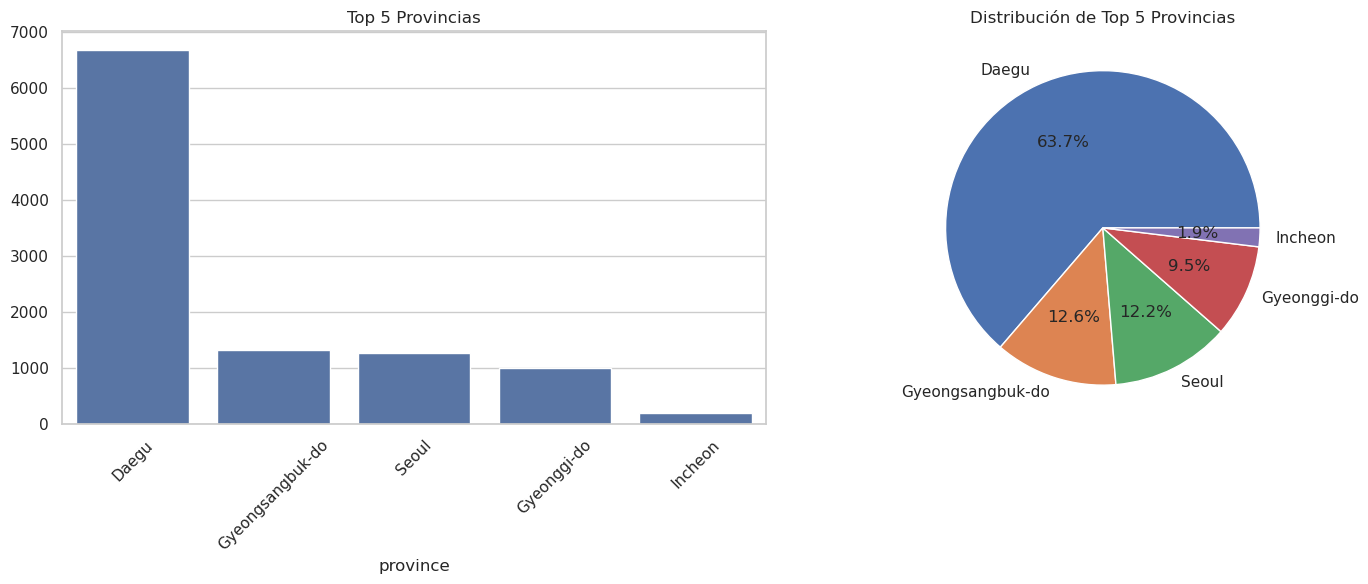

In [15]:
# Gráfico combinado similar a Excel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
sns.barplot(x=provincia_casos.index[:5], y=provincia_casos.values[:5], ax=ax1)
ax1.set_title("Top 5 Provincias")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Gráfico de pastel
ax2.pie(provincia_casos.values[:5], labels=provincia_casos.index[:5], autopct="%1.1f%%")
ax2.set_title("Distribución de Top 5 Provincias")

plt.tight_layout()
plt.show()

## 9. Conclusiones

Basado en nuestro análisis, podemos concluir:

1. Las provincias con mayor número de casos son...
2. Los principales focos de infección son...
3. La distribución de casos por grupo muestra...
4. Las ciudades más afectadas son...

Este análisis nos permite entender mejor la distribución y características de los casos de COVID-19 en el dataset.